In [1]:
import numpy as np 
from matplotlib import pyplot as plt

The longitudinal trajectory process

$ \tilde{Y}_{\rho_n} = D + \sum_{k=0}^{n-2} A_k (\rho_{k+1} - \rho_{k}) (\rho_n - \rho_{k+1}) + \frac{1}{2} \sum_{k=0}^{n-1} A_k (\rho_{k+1} - \rho_k)^2$

For the Monte Carlo simulation, we suppose $D = 0$ first.

Distribution of regeneration periods


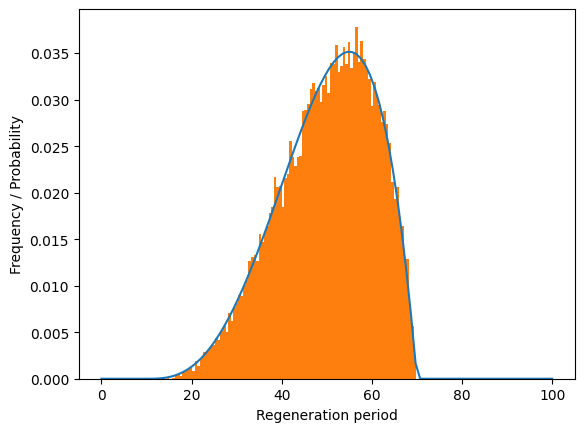

In [2]:
# Sample the regeneration points rho_k from beta distribution with parameters alpha and beta
from scipy.stats import beta

alph = 4
bet = 2
lok = 10
scal = 60
gen_peds = beta.rvs(alph, bet, size=25000, loc=lok, scale=scal)

# Plot the pdf of the beta distribution
plt.plot(np.linspace(0, 100, 100), beta.pdf(np.linspace(0, 100, 100), alph, bet, loc=lok, scale=scal))
plt.hist(gen_peds, bins=100, density=True)
plt.xlabel('Regeneration period')
plt.ylabel('Frequency / Probability')

print('Distribution of regeneration periods')

Text(0, 0.5, 'Frequency / Probability')

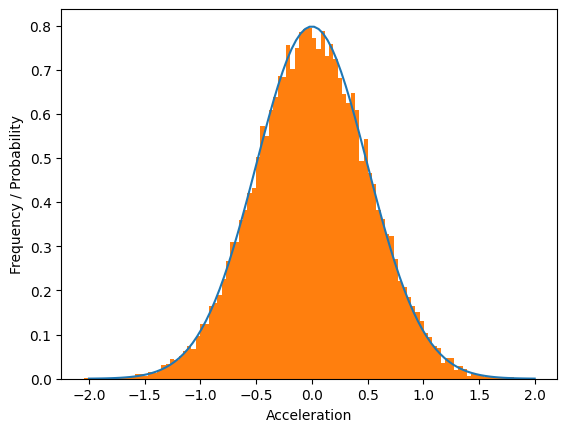

In [3]:
# Sample acceleration values from a Normal distribution
from scipy.stats import norm

mu_a = 0
sig_a = 0.5
accels = norm.rvs(loc = mu_a, scale = sig_a, size=25000)

# Plot the pdf of the Normal distribution
plt.plot(np.linspace(-2, 2, 100), norm.pdf(np.linspace(-2, 2, 100), loc = mu_a, scale = sig_a))
plt.hist(accels, bins=100, density=True)

plt.xlabel('Acceleration')
plt.ylabel('Frequency / Probability')

In [4]:
def gen_traj_particle(gen_peds, accels, n, D = 0):
    gen_peds_chosen = np.random.choice(gen_peds, size=n+1) # regeneration periods
    rho = np.cumsum(gen_peds_chosen) # regeneration points
    a_chosen = np.random.choice(accels, size=n+1) # accelerations
    s = D

    # Generate the trajectory
    for k in range(n-1):
        s = s + a_chosen[k] * (rho[k+1] - rho[k]) * (rho[n] - rho[k+1])
        
    for k in range(n):
        s = s + 0.5 * a_chosen[k] * (rho[k+1] - rho[k])**2
        
    return s
    
gen_traj_particle(gen_peds, accels, 50)

4632.115032089419

In [5]:
np.random.seed(6969)

s_50 = []
s_100 = []
s_200 = []

# Generate 5000 trajectories
for i in range(5000):
    s_50.append(gen_traj_particle(gen_peds, accels, 50))
    s_100.append(gen_traj_particle(gen_peds, accels, 100))
    s_200.append(gen_traj_particle(gen_peds, accels, 200))

print('Trajectory generation completed.')

Trajectory generation completed.


Text(0.5, 1.0, '200')

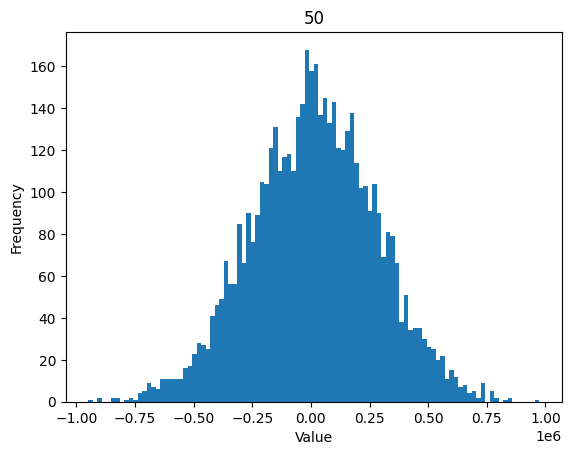

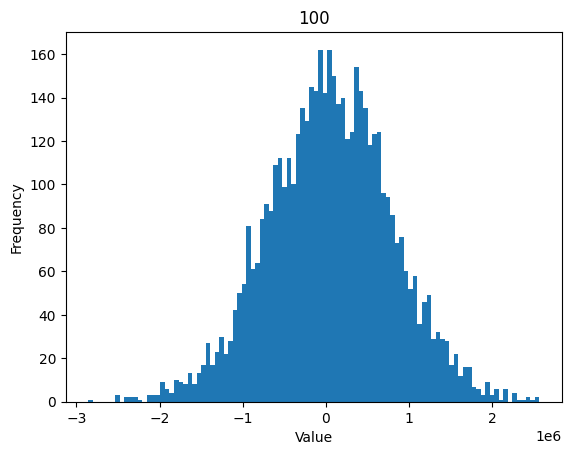

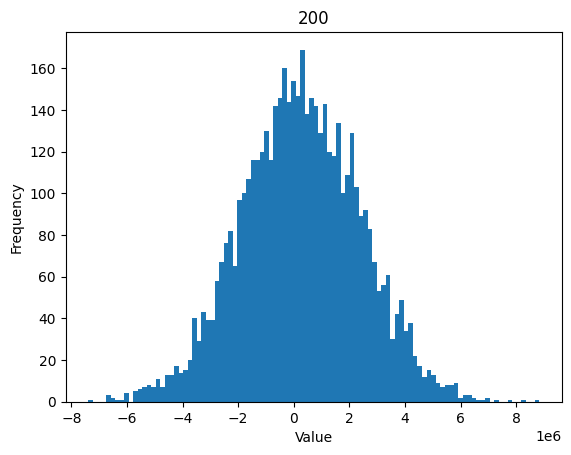

In [6]:
plt.hist(s_50, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('50')

plt.figure()
plt.hist(s_100, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('100')

plt.figure()
plt.hist(s_200, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('200')